## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
# """
# 設定要訓練的 Epoch 數
# """
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 31s 614us/step - loss: 2.2522 - acc: 0.1805 - val_loss: 2.1937 - val_acc: 0.2173
Epoch 2/500
50000/50000 [==============================] - 30s 595us/step - loss: 2.1539 - acc: 0.2339 - val_loss: 2.1215 - val_acc: 0.2491
Epoch 3/500
50000/50000 [==============================] - 30s 601us/step - loss: 2.0918 - acc: 0.2627 - val_loss: 2.0687 - val_acc: 0.2746
Epoch 4/500
50000/50000 [==============================] - 29s 581us/step - loss: 2.0466 - acc: 0.2814 - val_loss: 2.0295 - val_acc: 0.2880
Epoch 5/500
50000/50000 [==============================] - 29s 573us/step - loss: 2.0116 - acc: 0.2958 - val_loss: 1.9984 - val_acc: 0.3042
Epoch 6/500
50000/50000 [==============================] - 30s 595us/step - loss: 1.9836 - acc: 0.3073 - val_loss: 1.9734 - val_acc: 0.3186
Epoch 7/500
50000/50000 [==============================] - 29s

Epoch 57/500
50000/50000 [==============================] - 30s 601us/step - loss: 1.6493 - acc: 0.4274 - val_loss: 1.6592 - val_acc: 0.4174
Epoch 58/500
50000/50000 [==============================] - 30s 590us/step - loss: 1.6465 - acc: 0.4283 - val_loss: 1.6555 - val_acc: 0.4218
Epoch 59/500
50000/50000 [==============================] - 31s 621us/step - loss: 1.6437 - acc: 0.4293 - val_loss: 1.6530 - val_acc: 0.4232
Epoch 60/500
50000/50000 [==============================] - 31s 616us/step - loss: 1.6405 - acc: 0.4295 - val_loss: 1.6504 - val_acc: 0.4249
Epoch 61/500
50000/50000 [==============================] - 31s 621us/step - loss: 1.6375 - acc: 0.4316 - val_loss: 1.6479 - val_acc: 0.4223
Epoch 62/500
50000/50000 [==============================] - 32s 635us/step - loss: 1.6344 - acc: 0.4333 - val_loss: 1.6453 - val_acc: 0.4247
Epoch 63/500
50000/50000 [==============================] - 31s 629us/step - loss: 1.6317 - acc: 0.4345 - val_loss: 1.6420 - val_acc: 0.4256
Epoch 64/500


50000/50000 [==============================] - 31s 627us/step - loss: 1.5126 - acc: 0.4752 - val_loss: 1.5448 - val_acc: 0.4613
Epoch 116/500
50000/50000 [==============================] - 32s 642us/step - loss: 1.5110 - acc: 0.4746 - val_loss: 1.5436 - val_acc: 0.4602
Epoch 117/500
50000/50000 [==============================] - 32s 643us/step - loss: 1.5086 - acc: 0.4767 - val_loss: 1.5404 - val_acc: 0.4568
Epoch 118/500
50000/50000 [==============================] - 32s 645us/step - loss: 1.5070 - acc: 0.4761 - val_loss: 1.5426 - val_acc: 0.4563
Epoch 119/500
50000/50000 [==============================] - 33s 656us/step - loss: 1.5052 - acc: 0.4766 - val_loss: 1.5419 - val_acc: 0.4573
Epoch 120/500
50000/50000 [==============================] - 32s 644us/step - loss: 1.5032 - acc: 0.4780 - val_loss: 1.5369 - val_acc: 0.4570
Epoch 121/500
50000/50000 [==============================] - 33s 653us/step - loss: 1.5013 - acc: 0.4798 - val_loss: 1.5344 - val_acc: 0.4609
Epoch 122/500
50000/

Epoch 173/500
50000/50000 [==============================] - 32s 634us/step - loss: 1.4142 - acc: 0.5079 - val_loss: 1.4716 - val_acc: 0.4786
Epoch 174/500
50000/50000 [==============================] - 32s 635us/step - loss: 1.4128 - acc: 0.5086 - val_loss: 1.4690 - val_acc: 0.4807
Epoch 175/500
50000/50000 [==============================] - 32s 638us/step - loss: 1.4114 - acc: 0.5082 - val_loss: 1.4691 - val_acc: 0.4784
Epoch 176/500
50000/50000 [==============================] - 33s 650us/step - loss: 1.4099 - acc: 0.5085 - val_loss: 1.4747 - val_acc: 0.4820
Epoch 177/500
50000/50000 [==============================] - 31s 619us/step - loss: 1.4084 - acc: 0.5085 - val_loss: 1.4719 - val_acc: 0.4856
Epoch 178/500
50000/50000 [==============================] - 31s 625us/step - loss: 1.4067 - acc: 0.5091 - val_loss: 1.4722 - val_acc: 0.4826
Epoch 179/500
50000/50000 [==============================] - 32s 646us/step - loss: 1.4054 - acc: 0.5088 - val_loss: 1.4655 - val_acc: 0.4866
Epoch 

Epoch 231/500
50000/50000 [==============================] - 30s 590us/step - loss: 1.3318 - acc: 0.5342 - val_loss: 1.4214 - val_acc: 0.5005
Epoch 232/500
50000/50000 [==============================] - 29s 582us/step - loss: 1.3304 - acc: 0.5356 - val_loss: 1.4260 - val_acc: 0.4973
Epoch 233/500
50000/50000 [==============================] - 29s 586us/step - loss: 1.3293 - acc: 0.5345 - val_loss: 1.4320 - val_acc: 0.4981
Epoch 234/500
50000/50000 [==============================] - 30s 609us/step - loss: 1.3274 - acc: 0.5360 - val_loss: 1.4343 - val_acc: 0.4863
Epoch 235/500
50000/50000 [==============================] - 32s 635us/step - loss: 1.3263 - acc: 0.5367 - val_loss: 1.4158 - val_acc: 0.4987
Epoch 236/500
50000/50000 [==============================] - 30s 603us/step - loss: 1.3250 - acc: 0.5375 - val_loss: 1.4235 - val_acc: 0.4943
Epoch 237/500
50000/50000 [==============================] - 30s 592us/step - loss: 1.3243 - acc: 0.5366 - val_loss: 1.4131 - val_acc: 0.5009
Epoch 

50000/50000 [==============================] - 14s 271us/step - loss: 1.2599 - acc: 0.5583 - val_loss: 1.4096 - val_acc: 0.4961
Epoch 289/500
50000/50000 [==============================] - 13s 266us/step - loss: 1.2596 - acc: 0.5601 - val_loss: 1.3816 - val_acc: 0.5081
Epoch 290/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.2582 - acc: 0.5604 - val_loss: 1.3837 - val_acc: 0.5102
Epoch 291/500
50000/50000 [==============================] - 13s 268us/step - loss: 1.2577 - acc: 0.5613 - val_loss: 1.3943 - val_acc: 0.5004
Epoch 292/500
50000/50000 [==============================] - 13s 270us/step - loss: 1.2566 - acc: 0.5602 - val_loss: 1.3876 - val_acc: 0.5048
Epoch 293/500
50000/50000 [==============================] - 13s 270us/step - loss: 1.2551 - acc: 0.5623 - val_loss: 1.3938 - val_acc: 0.5024
Epoch 294/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.2544 - acc: 0.5621 - val_loss: 1.3951 - val_acc: 0.5087
Epoch 295/500
50000/

Epoch 346/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.1949 - acc: 0.5827 - val_loss: 1.3719 - val_acc: 0.5115
Epoch 347/500
50000/50000 [==============================] - 15s 294us/step - loss: 1.1944 - acc: 0.5817 - val_loss: 1.3584 - val_acc: 0.5174
Epoch 348/500
50000/50000 [==============================] - 15s 294us/step - loss: 1.1934 - acc: 0.5834 - val_loss: 1.3649 - val_acc: 0.5173
Epoch 349/500
50000/50000 [==============================] - 15s 297us/step - loss: 1.1921 - acc: 0.5838 - val_loss: 1.3568 - val_acc: 0.5152
Epoch 350/500
50000/50000 [==============================] - 15s 293us/step - loss: 1.1929 - acc: 0.5825 - val_loss: 1.3586 - val_acc: 0.5177
Epoch 351/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.1908 - acc: 0.5829 - val_loss: 1.3676 - val_acc: 0.5109
Epoch 352/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.1903 - acc: 0.5831 - val_loss: 1.3616 - val_acc: 0.5160
Epoch 

Epoch 404/500
50000/50000 [==============================] - 14s 289us/step - loss: 1.1362 - acc: 0.6045 - val_loss: 1.3461 - val_acc: 0.5206
Epoch 405/500
50000/50000 [==============================] - 15s 302us/step - loss: 1.1338 - acc: 0.6037 - val_loss: 1.3636 - val_acc: 0.5138
Epoch 406/500
50000/50000 [==============================] - 15s 310us/step - loss: 1.1325 - acc: 0.6041 - val_loss: 1.3590 - val_acc: 0.5177
Epoch 407/500
50000/50000 [==============================] - 14s 287us/step - loss: 1.1337 - acc: 0.6042 - val_loss: 1.3460 - val_acc: 0.5267
Epoch 408/500
50000/50000 [==============================] - 18s 356us/step - loss: 1.1310 - acc: 0.6051 - val_loss: 1.3878 - val_acc: 0.5103
Epoch 409/500
50000/50000 [==============================] - 28s 562us/step - loss: 1.1303 - acc: 0.6049 - val_loss: 1.3753 - val_acc: 0.5134
Epoch 410/500
50000/50000 [==============================] - 27s 549us/step - loss: 1.1288 - acc: 0.6050 - val_loss: 1.3527 - val_acc: 0.5187
Epoch 

Epoch 462/500
50000/50000 [==============================] - 25s 507us/step - loss: 1.0766 - acc: 0.6238 - val_loss: 1.3427 - val_acc: 0.5272
Epoch 463/500
50000/50000 [==============================] - 25s 494us/step - loss: 1.0761 - acc: 0.6238 - val_loss: 1.3671 - val_acc: 0.5189
Epoch 464/500
50000/50000 [==============================] - 26s 517us/step - loss: 1.0750 - acc: 0.6247 - val_loss: 1.3647 - val_acc: 0.5214
Epoch 465/500
50000/50000 [==============================] - 25s 504us/step - loss: 1.0761 - acc: 0.6251 - val_loss: 1.3706 - val_acc: 0.5219
Epoch 466/500
50000/50000 [==============================] - 27s 539us/step - loss: 1.0724 - acc: 0.6261 - val_loss: 1.3602 - val_acc: 0.5238
Epoch 467/500
50000/50000 [==============================] - 25s 500us/step - loss: 1.0746 - acc: 0.6245 - val_loss: 1.3549 - val_acc: 0.5193
Epoch 468/500
50000/50000 [==============================] - 25s 492us/step - loss: 1.0714 - acc: 0.6262 - val_loss: 1.3548 - val_acc: 0.5204
Epoch 

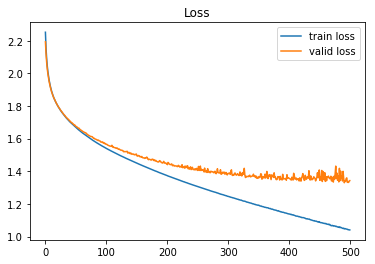

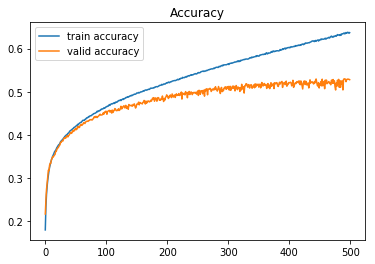

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()